# Introduction to Machine Learning with sklearn

In this exercise, we'll learn the basics of machine learning using sklearn (scikit-learn), Python's most popular ML library. We'll predict airline passenger numbers over time.

## Part 1: Load and Prepare the Data


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).

We have 144 months of data


<Axes: xlabel='Month'>

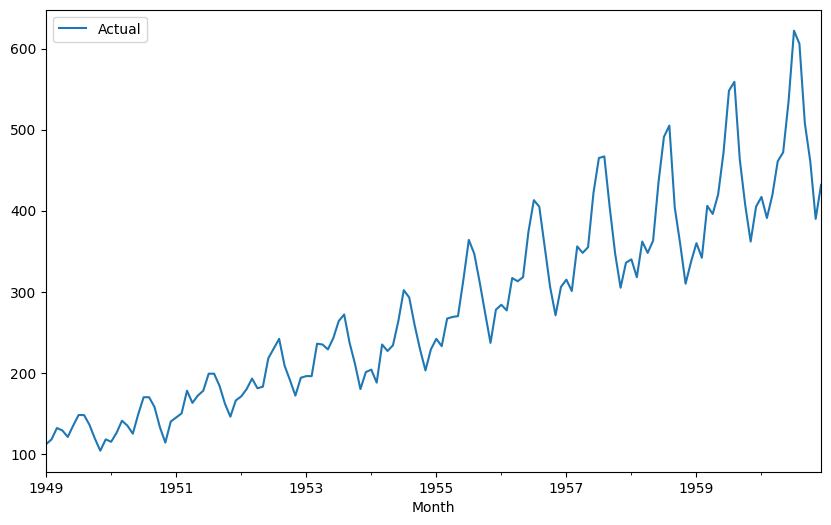

In [63]:
# JUST RUN THIS

from google.colab import drive
import pandas as pd

drive.mount('/content/gdrive')

# Load and clean the data
df = pd.read_csv('/content/gdrive/MyDrive/datasets/air_passengers.csv')
df.rename(columns={'#Passengers': 'Passengers'}, inplace=True)
df['Month'] = pd.to_datetime(df['Month'])

# Create our feature: months since start
df['Month_Count'] = (df['Month'].dt.year - 1949) * 12 + df['Month'].dt.month - 1

# Look at our data
print(f"\nWe have {len(df)} months of data")
df.head()


df.plot(x='Month', y='Passengers', label='Actual', figsize=(10, 6))


## Part 2: Preparing Data for Machine Learning

In machine learning:
- **Features (X)**: What we use to make predictions (Month_Count)
- **Labels (y)**: What we're trying to predict (Passengers)

We also need to split our data:
- **Training data**: Used to learn the pattern
- **Testing data**: Used to check if we learned correctly



In [64]:
# JUST RUN THIS

# Create X and y for sklearn
# X needs to be 2D (that's why we use double brackets)
X = df[['Month_Count']]  # Features - notice the double brackets!
y = df['Passengers']     # Labels

print(f"X shape: {X.shape}")  # Should be (144, 1)
print(f"y shape: {y.shape}")  # Should be (144,)

# Split into training and testing sets
# Everything before 1958 is training
train_mask = df['Month'] < '1958-01-01'
test_mask = df['Month'] >= '1958-01-01'

X_train = X[train_mask]
y_train = y[train_mask]
X_test = X[test_mask]
y_test = y[test_mask]

print(f"\nTraining samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")


X shape: (144, 1)
y shape: (144,)

Training samples: 108
Testing samples: 36


## Part 3: Your First sklearn Model

Let's implement a function to train a linear regression model:

The way you'll do this is by initializing a model:
```python
model = LinearRegression()
```

And then calling the `.fit` method and passing it `X_train` and `y_train`.

```python
model.fit(X_train, y_train)
```

Make sure you return the model when you're done.


In [65]:
# EDIT THIS

from sklearn.linear_model import LinearRegression

def train_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

# Train the model using your function
model = train_model(X_train, y_train)

# Check what the model learned
print(f"Slope: {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Line equation: y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}")


Slope: 2.49
Intercept: 97.53
Line equation: y = 2.49x + 97.53


## Part 4: Making Predictions

Now implement a function that uses the trained model:

The input to this function is the `X_test` values that we _didn't_ train the model on (in our case, `X` is just what month it is).

You'll do this using:

```python
y_pred = model.predict(X_values)
```

The output will be the labels `y` that the model will predict for those `X` values (in our case `y` is the number of passengers for the month in `X`).

In [66]:
# EDIT THIS

def make_predictions(model, X):
    y_pred = model.predict(X)
    return y_pred

# Test your function
y_pred = make_predictions(model, X_test)

# Turn into a pandas series and set the index to y_test's for plotting purposes
y_pred = pd.Series(y_pred, index=y_test.index)

# Show the first 5
display(y_pred.head())

,0
108,366.754067
109,369.246836
110,371.739605
111,374.232375
112,376.725144


## Part 5: Visualize the Results

Once you've made the predictions we can visualize the results.

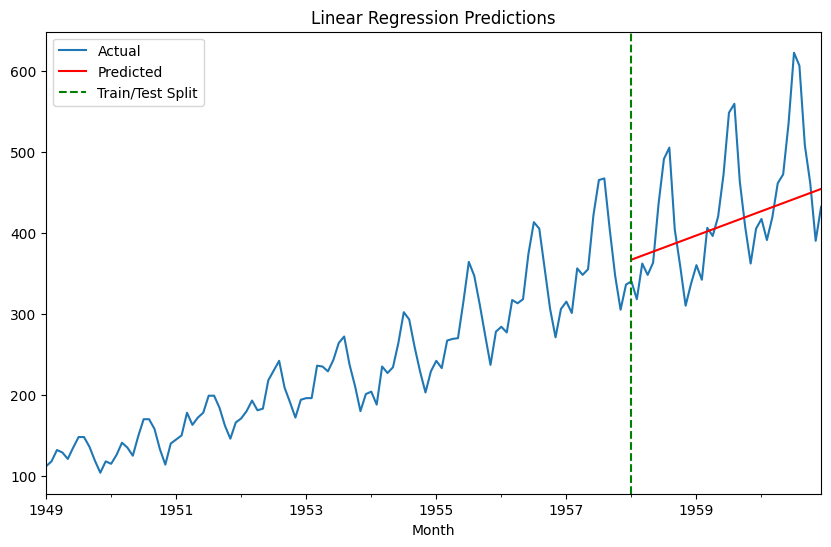

In [67]:
# JUST RUN THIS
import matplotlib.pyplot as plt

# Add predictions to our dataframe
df['Predictions'] = y_pred

# Plot actual vs predicted
ax = df.plot(x='Month', y="Passengers", label='Actual', figsize=(10, 6))
df.plot(x='Month', y='Predictions', ax=ax, color='red', label='Predicted')

# Add a line showing train/test split
plt.axvline(pd.to_datetime('1958-01-01'), color='green', linestyle='--', label='Train/Test Split')
plt.title('Linear Regression Predictions')
plt.legend()
plt.show()

# Part 6: Evaluate the Model

How good are our predictions? Let's calculate the Mean Squared Error (MSE):

At this point, we have two Series (vectors):

- `y_test`: The real passenger numbers we set aside for testing and did not use to train the model.
- `y_pred`: The predicted passenger numbers from our linear regression model.

These two series represent the same months: one is the actual data, and the other is the model's prediction.

To evaluate our model, we'll calculate the Mean Squared Error (MSE):

1. Find the difference between the real values (`y_test`) and the predicted values (`y_pred`) for each month.
2. Square each difference.
3. Calculate the average of these squared differences.

In [68]:
# EDIT THIS

def calculate_test_mse(y_test, y_pred):
    # n = len(y_test)
    # total = 0
    # for i in range(n):
    #     total += (y_test[i] - y_pred[i]) ** 2
    # mse = total / n
    mse = ((y_test - y_pred) ** 2).mean()
    return mse

# Calculate MSE on test data only
y_pred = df["Predictions"][test_mask]
test_mse = calculate_test_mse(y_test, y_pred)
print(f"Test MSE: {test_mse:.2f}")

Test MSE: 4989.60


## Bonus: A Better Model

Notice how our data curves upward? Linear regression only fits straight lines. Here's a model that can fit curved patterns:

```python
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# This creates a model that can fit curves!
poly_model = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())
])

# Try it out if you're curious!
poly_model.fit(X_train, y_train)
poly_predictions = poly_model.predict(X)

# Plot the curved predictions
df['Poly_Predictions'] = poly_predictions
ax = df.plot(x='Month', y='Passengers', label='Actual', figsize=(10, 6))
df.plot(x='Month', y='Predictions', ax=ax, color='red', label='Linear')
df.plot(x='Month', y='Poly_Predictions', ax=ax, color='green', label='Polynomial')
plt.legend()
plt.show()
```

This polynomial model can capture the curved growth pattern in airline passengers much better than a straight line!


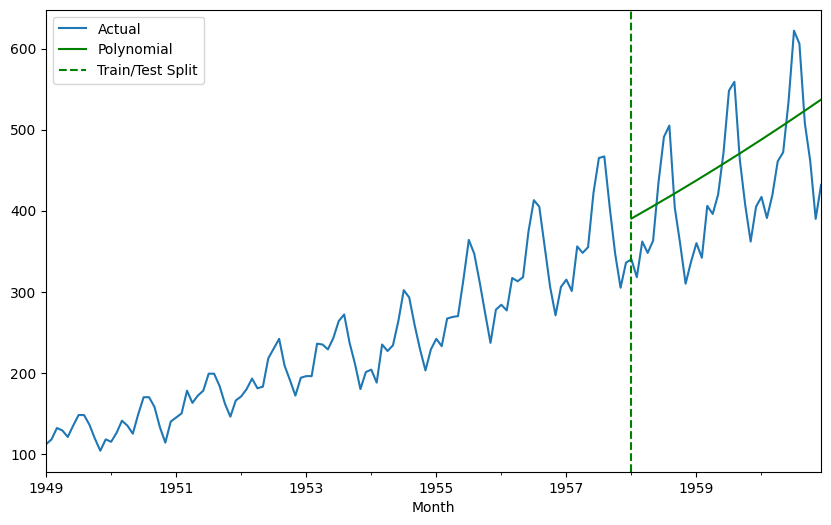

In [69]:
# BONUS CODE HERE

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# This creates a model that can fit curves!
poly_model = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())
])

poly_model.fit(X_train, y_train)
y_pred = pd.Series(poly_model.predict(X_test), index=y_test.index)

# Plot the curved predictions
df['Poly_Predictions'] = y_pred
ax = df.plot(x='Month', y='Passengers', label='Actual', figsize=(10, 6))
df.plot(x='Month', y='Poly_Predictions', ax=ax, color='green', label='Polynomial')
plt.axvline(pd.to_datetime('1958-01-01'), color='green', linestyle='--', label='Train/Test Split')
plt.legend()
plt.show()

In [75]:
test_mse = calculate_test_mse(y_test, y_pred)
print(f"Test MSE: {test_mse:.2f}")

Test MSE: 1415.22


# Bonus 2: Feature Engineering

Here we'll do some feature engineering. We observe two things:

1. The month seems to infleunce the number of passengers as well as the year.
2. There is a sinusoidal fluxuation across each yet.
3. The size of the sinusoidal fluxuation goes up each year.

We can use these three facts to create new features and then fit a LinearRegression to them.

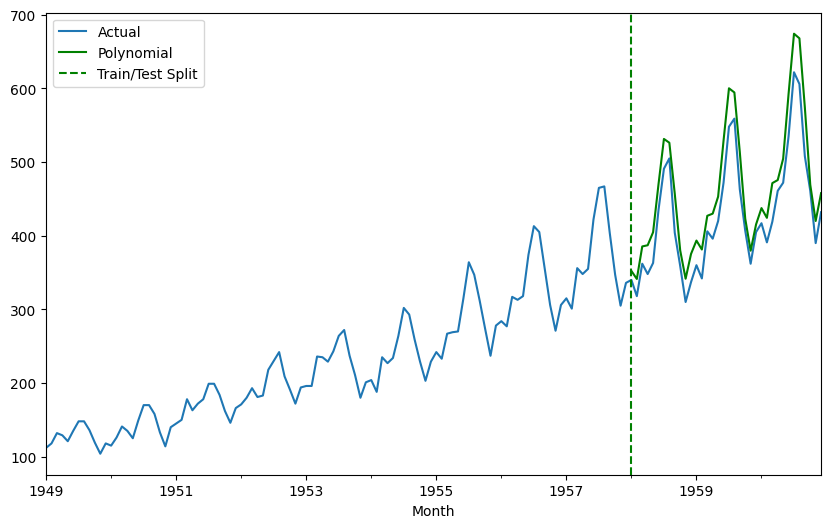

Test MSE: 1415.22


In [80]:
import numpy as np

def make_features(X):
    # Copy the dataframe to avoid side-effects o
    X = X.copy()

    # Year_Count will be how many years since 1948
    X["Year_Count"] = X["Month_Count"] // 12

    # Instead of Month_Count being the number of months since 1948,
    # we'll makeit which month of the year it is, 0-11.
    X["Month_Count"] = X["Month_Count"] % 12

    # We'll calculate both a sin and cos of Month_Count
    X["Month_sin"] = np.sin(2 * np.pi * X["Month_Count"] / 12)
    X["Month_cos"] = np.cos(2 * np.pi * X["Month_Count"] / 12)

    # And an intereaction feature of the Year with Month_sin/cos to
    # capture how the size of the curve gets larger with year.
    X["Year_sin"] = X["Year_Count"] * X["Month_sin"]
    X["Year_cos"] = X["Year_Count"] * X["Month_cos"]

    return X

new_X_train = make_features(X_train)
new_X_test  = make_features(X_test)

poly_model = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())
])
poly_model.fit(new_X_train, y_train)

y_pred = pd.Series(poly_model.predict(new_X_test), index=y_test.index)

# Plot the curved predictions
df['Feature_Engineered_Predictions'] = y_pred
ax = df.plot(x='Month', y='Passengers', label='Actual', figsize=(10, 6))
df.plot(x='Month', y='Feature_Engineered_Predictions', ax=ax, color='green', label='Polynomial')
plt.axvline(pd.to_datetime('1958-01-01'), color='green', linestyle='--', label='Train/Test Split')
plt.legend()
plt.show()

test_mse = calculate_test_mse(y_test, y_pred)
print(f"Test MSE: {test_mse:.2f}")